## Analytic description of WPIT.Environment_mod routines with examples

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
from matplotlib.pyplot import cm

#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)

import WPIT.Environment_mod as env
print(fpath)

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT


 <a class="anchor" id="top-bullet"></a>
### Table of Contents

* [environment_mod.Bmag_dipole](#Bmag_dipole-bullet)
* [environment_mod.dwc_ds](#dwc_ds-bullet)
* [environment_mod.dB_ds](#dB_ds-bullet)
* [environment_mod.Lshell](#Lshell-bullet)
* [environment_mod.density_equ_carpenter_anderson](#carpender_anderson-bullet)
* [environment_mod.density_FL_denton](#densities_denton-bullet)
* [environment_mod.density_ozhogin](#densities_ozhogin-bullet)
* [environment_mod.density_equ_sheeley](#densities_palsmasphere_sheeley-bullet)
* [environment_mod.omega_cyclotron](#omega_cyclotron-bullet)
* [environment_mod.omega_plasma](#omega_plasma-bullet)
* [environment_mod.omega_upper_hybrid](#omega_upper_hybrid-bullet)
* [environment_mod.omega_lower_hybrid](#omega_lower_hybrid-bullet)
* [environment_mod.aeq2alpha](#aeq2alpha-bullet)
* [environment_mod.alpha2aeq](#alpha2aeq-bullet)
* [environment_mod.T_bounce](#bounce_period-bullet)
* [environment_mod.T_drift](#drift_period-bullet)
* [environment_mod.R_Larmor](#larmor-bullet)
* [environment_mod.mu_adiabatic](#mu_adiabatic-bullet)
* [environment_mod.initial_velocity](#momentums-bullet)
* [environment_mod.loss_cone](#loss_cone-bullet)
* [environment_mod.loss_cone_v2](#loss_cone_v2-bullet)
* [environment_mod.debye_length](#debye_length-bullet)
* [environment_mod.const](#const-bullet)


# 1. environment_mod.Bmag_dipole  <a class="anchor" id="Bmag_dipole-bullet"></a>

**Routine to calculate the geomagnetic dipole field strength**

***

**<font color='blue'>Description</font>**


For a centered dipole Earth’s magnetic field model, the components of the magnetic field are given as [Parks,1991]:


$$B_r=-2B_0 \frac{R_e^3}{r^3}sin \lambda  $$
$$ B_{\lambda}=B_0\frac{R_e^3}{r^3}cos \lambda  $$
$$B_{\theta}=0$$
and:
$$B=\sqrt{B_r^2+B_{\lambda}^2}=B_{0,eq}\frac{R_e^3}{r^3} \sqrt{1+3sin^2\lambda}$$
where $r$ and $\lambda$ are the geocentric radial distance and latitude respectively, $R_e$ is the
Earth’s radius, and $B_{0,eq}$ is the value of the geomagnetic field at
the Earth’s surface equator, taken as $3.12 × 10^{−5} T$. 

The radius of a field line in a centered dipole field is given as
$$r=R_e L\cos^2 \lambda$$
subsituting r in the expression for the dipole magnetic field strength, we get:
$$ B=B_{0,eq}\frac{R_e^3}{(R_e L\cos^2 \lambda)^3} \sqrt{1+3sin^2\lambda}=B_{0,eq} \frac{1}{L^3} \frac{\sqrt{1+3sin^2\lambda}}{\cos^6 \lambda}$$

*** 
**<font color='red'>Inputs</font>**

**L_arg**: L shell

**lamda_arg**: magnetic latitude in rad

***

**<font color='green'>Outputs</font>**

**Bmag**: Geomagnetic field in T

***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 54

***

[Return to top](#top-bullet) 



#### Example

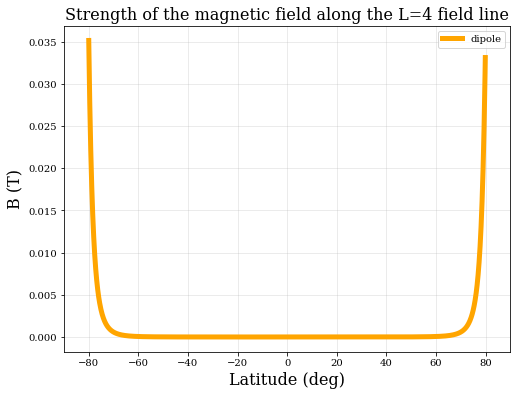

In [2]:
#Latitude range of interest
lats_deg = np.arange(-80,80,0.1)
#Covert from deg to rad
lats_rad = np.deg2rad(lats_deg)
#Lshell of interest
L_shell=4

#call environment_mod.Bmag_dipole routine
Bmag=env.Bmag_dipole(L_shell,lats_rad)

###Plot Output##############################################
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=16
ax.set_title('Strength of the magnetic field along the L=4 field line',fontsize=fonts)

ax.plot(lats_deg,Bmag,c='orange',linewidth=s,label='dipole')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()


plt.show()
############################################################

[Return to top](#top-bullet) 

## 2. environment_mod.dwc_ds <a class="anchor" id="dwc_ds-bullet"></a>


**Routine to calculate the gradient of gyrofrequency with respect to the distance along the magnetic field line**

***

**<font color='blue'>Description</font>**

The 
$$ds=L R_e (1+ 3 \sin^2 \lambda)^{1/2} \cos \lambda d \lambda $$ [e.g. Tao et al.2012].

$$\frac{d\lambda}{ds}=\frac{1}{L R_e (1+ 3 \sin^2 \lambda)^{1/2} \cos \lambda}$$
The gyrofrecuency is defined as:
$$ \omega_{c} = \frac {q_e B}{m_e} = \frac {q_e B_0}{m_e} \frac{1}{L^3} \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda}= \xi \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda}  $$

with

$$\xi=\frac {q_e B_0}{m_e} \frac{1}{L^3}$$

The derivative of gyrofrequency along the field line is:

$$\frac{\partial \omega_H}{\partial s}= \frac{\partial \omega_H}{\partial \lambda} \frac{\partial \lambda}{\partial s}  $$

Where
$$ \frac{\partial \omega_H}{\partial \lambda}= \xi \frac{\partial}{\partial \lambda} \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda} = \xi \frac{\cos^6 \lambda \frac{\partial}{\partial \lambda} \sqrt{1+3\sin^2 \lambda}-\sqrt{1+3\sin^2 \lambda}\frac{\partial}{\partial \lambda}\cos^6 \lambda  }{\cos^{12} \lambda}=$$
$$=\xi \Big[ \frac{\frac{1}{2\sqrt{1+3\sin^2 \lambda}}\frac{\partial}{\partial \lambda}(1+3\sin^2\lambda)}{\cos^6 \lambda} - \frac{\sqrt{1+3\sin^2 \lambda }6 \cos^5 \lambda \frac{\partial}{\partial \lambda} \cos \lambda}{\cos^{12} \lambda} \Big] =$$
$$=\xi \Big[ \frac{6 \sin \lambda \cos \lambda}{2 \cos^6 \lambda \sqrt{1+3\sin^2 \lambda} } - \frac{\sqrt{1+3\sin^2 \lambda} 6 \cos^5 \lambda (-\sin \lambda)}{\cos^{12} \lambda} \Big] =$$
$$=\xi \Big[ \frac{3 \sin \lambda \cos \lambda}{\cos^6 \lambda \sqrt{1+3\sin^2 \lambda}} + \frac{6 \sin \lambda \sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda \cos\lambda} \Big] = $$
$$=3 \xi \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda} \Big[ \frac{\sin \lambda \cos \lambda}{\sqrt{1+3\sin^2 \lambda}^2}+ \frac{2\sin\lambda}{\cos\lambda} \Big] = $$
$$=3 \omega_H \sin \lambda \cos\lambda \Big[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Big] $$
Thus:
$$\frac{\partial \omega_H}{\partial s}=  \frac{\partial \omega_H}{\partial \lambda} \frac{\partial \lambda}{\partial s}  =\frac{1}{R_e L \cos \lambda \sqrt{1+3\sin^2 \lambda}} 3 \omega_H \sin \lambda \cos \lambda \Bigg[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Bigg] =$$
$$\frac{\partial \omega_H}{\partial s}=\frac{3 \omega_H}{R_e L} \frac{\sin \lambda}{\sqrt{1+3\sin^2 \lambda}} \Bigg[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Bigg] $$

***

**<font color='red'>Inputs</font>**

**wc_arg**: gyrofrequency in rad/s

**lamda_arg**: magnetic latitude in rad

**L_arg**: L shell

***

**<font color='green'>Outputs</font>**

**dwce_ds_arg**:  gradient of gyrofrequency along the field line

***

**Reference**

***

Tao, X., et al. "Effects of amplitude modulation on nonlinear interactions between electrons and chorus waves." Geophysical Research Letters 39.6 (2012).

***

[Return to top](#top-bullet) 




#### Example

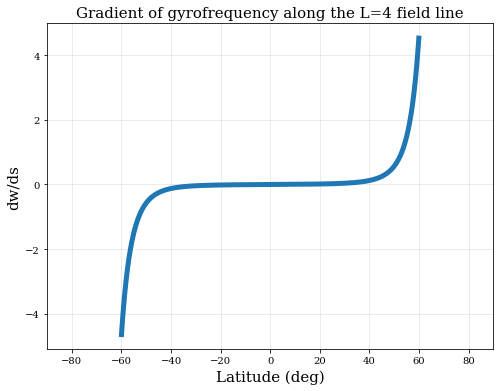

In [3]:
#Latitude range of interest
lats_deg = np.arange(-60,60,0.1)
#Covert from deg to rad
lats_rad = np.deg2rad(lats_deg)
#Lshell of interest
L_shell=4

#call environment_mod.Bmag_dipole routine
Bmag=env.Bmag_dipole(L_shell,lats_rad)
#call environment_mod.omega_cyclotron routine
wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
#call environment_mod.dwc_ds routine
dwceds=env.dwc_ds(wce,lats_rad,L_shell)

###Plot Output##############################################
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=15
ax.set_title('Gradient of gyrofrequency along the L=4 field line',fontsize=fonts)
ax.plot(lats_deg,dwceds,label='dwceds',linewidth=s)
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'dw/ds',fontsize=fonts)
# ax.legend()



plt.show()
############################################################

[Return to top](#top-bullet) 

## 3. environment_mod.dB_ds <a class="anchor" id="dB_ds-bullet"></a>

**Routine to calculate the gradient of magnetic field strength with respect to the distance along the magnetic field line**

***

**<font color='blue'>Description</font>**

Similarly with the calculation of $\frac{\partial \omega_c}{\partial s}$:

$$\frac{\partial B}{\partial s}=\frac{3 B}{R_e L} \frac{\sin \lambda}{\sqrt{1+3\sin^2 \lambda}} \Bigg[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Bigg] $$

***

**<font color='red'>Inputs</font>**

B_arg: magnetic field in T

lamda_arg: magnetic latitude in rad

L_arg: L shell

***

**<font color='green'>Outputs</font>**


dB_ds_arg:  gradient of magnetic field along the field line

***

**Reference**

e.g. Tao, X., et al. "Effects of amplitude modulation on nonlinear interactions between electrons and chorus waves." Geophysical Research Letters 39.6 (2012).

***

[Return to top](#top-bullet) 


#### Example

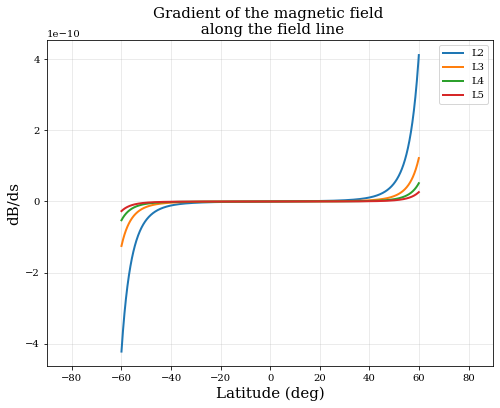

In [4]:
#Latitude range of interest
lats_deg = np.arange(-60,60,0.1)
#Covert from deg to rad
lats_rad = np.deg2rad(lats_deg)
#Lshell of interest
L_shell=[2,3,4,5]


#call environment_mod.Bmag_dipole routine
Bmag_L2=env.Bmag_dipole(L_shell[0],lats_rad)
Bmag_L3=env.Bmag_dipole(L_shell[1],lats_rad)
Bmag_L4=env.Bmag_dipole(L_shell[2],lats_rad)
Bmag_L5=env.Bmag_dipole(L_shell[3],lats_rad)
#call environment_mod.dB_ds routine
dBds_L2=env.dB_ds(Bmag_L2,lats_rad,L_shell[0])
dBds_L3=env.dB_ds(Bmag_L3,lats_rad,L_shell[0])
dBds_L4=env.dB_ds(Bmag_L4,lats_rad,L_shell[0])
dBds_L5=env.dB_ds(Bmag_L5,lats_rad,L_shell[0])
                

###Plot Output##############################################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,dBds_L2,linewidth=s,label='L2')
ax.plot(lats_deg,dBds_L3,linewidth=s,label='L3')
ax.plot(lats_deg,dBds_L4,linewidth=s,label='L4')
ax.plot(lats_deg,dBds_L5,linewidth=s,label='L5')

ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_title('Gradient of the magnetic field \n along the field line',fontsize=fonts)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'dB/ds',fontsize=fonts)
ax.legend()

plt.show()
#############################################################

[Return to top](#top-bullet) 

## 4. environment_mod.Lshell <a class="anchor" id="Lshell-bullet"></a>

**Calculate the Lshell given the latitude and the geocentric distance**

***

**<font color='blue'>Description</font>**

For a dipole field model

$$ L=\frac{r}{R_e \cos^2\lambda}$$

***

**<font color='red'>Inputs</font>**

**r_arg**: geocentric distance in km

**lat_arg**: magnetic latitude in rad

***

**<font color='green'>Outputs</font>**

**L_tmp**:  L shell

***

**Reference**

e.g. Tao, X., et al. "Effects of amplitude modulation on nonlinear interactions between electrons and chorus waves." Geophysical Research Letters 39.6 (2012).

***

[Return to top](#top-bullet) 

### Example

In [5]:
# Geocentric distance in m
rgeo=10000e3
#Latitude of interest in rad
lat_mag=np.deg2rad(10)

#call environment_mod.magLshell routine
Lsh= env.Lshell(rgeo,lat_mag)

print('geocentric distance:', rgeo/1000, 'km')
print('magnetic latitude:', np.rad2deg(lat_mag), 'deg')
print('current L shell:', Lsh)

geocentric distance: 10000.0 km
magnetic latitude: 10.0 deg
current L shell: 1.6166024720475014


[Return to top](#top-bullet) 

## 5. environment_mod.density_equ_carpenter_anderson <a class="anchor" id="carpender_anderson-bullet"></a>

**Calculate the equatorial electron density according to Carpender and Anderson [1992] model**

***

**<font color='blue'>Description</font>**

a. Plasmapause inner limit $L_{ppi}$:
$$L_{ppi}=5.6-0.46Kp_{max}$$

where $Kp_{max}$ is the maximum Kp value in the preceding 24 hours.

b. The saturated plasmasphere segment for $2.25 \leq L \leq L_{ppi} $:

$$ log_{ne}=(-0.3145L+3.9043)+[0.15(cos\frac{2\pi(d+9)}{365}-0.5 cos\frac{4\pi(d+9)}{365})+0.00127 \bar{R} -0.0635] e^{-\frac{L-2}{1.5}}$$

where $d$ is the day number, $t$ is the magnetic local time and $\bar{R}$ is the 13 month average sunspot number. 

c. The plasmapause segment for $L_{ppi} \leq L \leq L_{ppo}$:

\begin{equation}
  ne=\begin{cases}
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1}}& 00\leq t < 06 MLT \\
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1+0.011(t-6)}}& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}


d. The extended plasma trough for $2.25 \leq L \leq 8$:
\begin{equation}
  ne=\begin{cases}
   (5800+300t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 00\leq t < 06 MLT \\
    (-800+1400t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}

e. The plasmapuse outer limit $L_{ppo}$, determined by solving simultaneously for the plasmapause segment and the extended plasma trough.

f. The plasma trough segment for $L_{ppo} \leq L \leq 8$:
$$ne=ne(L_{ppo})(\frac{L}{L_{ppo}})^{-4.5}+(1-e^{-\frac{L-2}{10}})$$


***

**<font color='red'>Inputs</font>**

**Lsh**: L shell

**Kpmax**: the maximum Kp value in the preceding 24 hours

**day**: the day number

**mlt**: the magnetic local time

**Rb**: the 13-month average sunspot number

***

**<font color='green'>Outputs</font>**


**ne_eq**: equatorial electron density in cm^-3

***

**Reference**

[Carpenter, D. L., and R. R. Anderson. "An ISEE/whistler model of equatorial electron density in the magnetosphere." Journal of Geophysical Research: Space Physics 97.A2 (1992): 1097-1108.]

***

[Return to top](#top-bullet) 

### Example

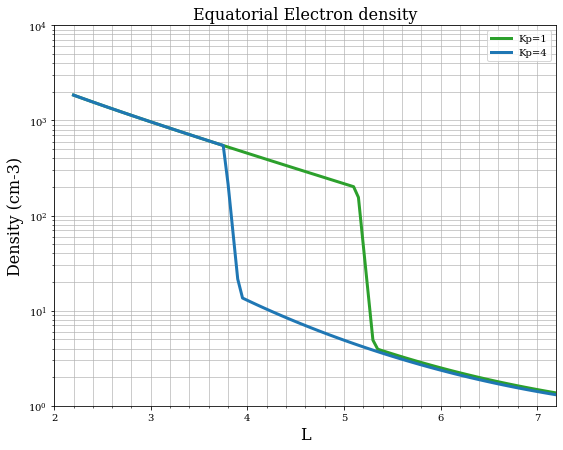

In [6]:
# L shells of interest
Lshell=np.arange(2.2,8,0.05)
# Kp value in the preceding 24 hours
Kpmax1=1
Kpmax2=4
# day number (here January the first)
day=0
#magnetic local time (02.00)
mlt=2
#13 month average sunspot number
Rsun=90

#initialize an empty array
ne_final_min=[]
ne_final_max=[]

for i in range(0,len(Lshell)):
    # call environment_mod.carpender_anderson routine
    ne_min=env.density_equ_carpenter_anderson(Lshell[i],Kpmax1,day,mlt,Rsun)
    ne_max=env.density_equ_carpenter_anderson(Lshell[i],Kpmax2,day,mlt,Rsun)
    ne_final_min.append(ne_min)
    ne_final_max.append(ne_max)

###Plot##############################################
fig, ax = plt.subplots(figsize=(9,7))
s=3
ax.set_title('Equatorial Electron density',fontsize=16)
ax.set_xlabel("L",fontsize=16)
ax.set_ylabel("Density (cm-3)",fontsize=16)

ax.plot(Lshell,ne_final_min,color="tab:green",linewidth=s,label='Kp=1')
ax.plot(Lshell,ne_final_max,color="tab:blue",linewidth=s,label='Kp=4')
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.legend()
ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_ylim([10**(0), 10**4])
ax.set_xlim([2,7.2])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################

[Return to top](#top-bullet) 

## 6. environment.density_FL_denton <a class="anchor" id="densities_denton-bullet"></a>

**Routine to calculate the electron density along a magnetic field line after [Denton et al., 2002]**

***

**<font color='blue'>Description</font>**

$$n_e=n_{eq}\cos^{-4}\lambda$$

***

**<font color='red'>Inputs</font>**

**ne0_arg**: equatorial electron number density

**lamda_arg**: geomagnetic latitude in rad

***

**<font color='green'>Outputs</font>**

**n_e_tmp**: electron number density

***

**Reference**

Denton, R. E., J. Goldstein, and J. D. Menietti (2002), Field line depen-
dence of magnetospheric electron density, Geophys. Res. Lett., 29(24),
2205, doi:10.1029/2002GL015963.

***

[Return to top](#top-bullet) 

### Example

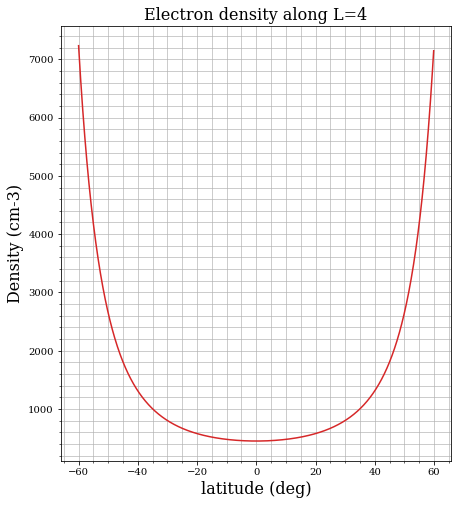

In [7]:
# latitudes of interest
lats_deg = np.arange(-60,60,0.1)
# cobert to rad from deg
lats_rad = np.deg2rad(lats_deg)
# L_shell of interest
L_shell=4
# Carpender-Anderson model parameters
Kpmax=1
day=0
mlt=2
Rsun=90
#call environment_mod.carpender_anderson
ne_eq_L4=env.density_equ_carpenter_anderson(L_shell,Kpmax,day,mlt,Rsun)
#initialise an empty array
ne_L4=[]

for i in range(0,len(lats_rad)):
    #call environment_mod.densities_denton
    netmp=env.density_FL_denton(ne_eq_L4,lats_rad[i])
    ne_L4.append(netmp)
    
###Plot Output##############################################
fig, ax = plt.subplots(figsize=(7,8))
s=5
ax.set_title('Electron density along L=4',fontsize=16)
ax.set_xlabel("latitude (deg)",fontsize=16)
ax.set_ylabel("Density (cm-3)",fontsize=16)

ax.plot(lats_deg,ne_L4,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################    

[Return to top](#top-bullet) 

## 7. environment.density_ozhogin  <a class="anchor" id="densities_ozhogin-bullet"></a>

**Routine to calculate the electron density along a magnetic field line after [Ozhogin et al., 2012]**

***

**<font color='blue'>Description</font>**

$$n_{eq}(L)=10^{4.4693-0.1903*L}$$

$$n_e(L,\lambda)=n_{eq}(L) \cos^{-0.75} \Big(\frac{\pi}{2}\frac{\lambda}{\lambda_{inv}}\Big)$$

$$\lambda_{inv}=arccos\sqrt{\frac{1}{L}}$$

***

**<font color='red'>Inputs</font>**

**L_arg**: Lshell

**lamda_arg**: geomagnetic latitude in rad


***

**<font color='green'>Outputs</font>**

**neqtmp**: equatorial electron number density

**n_lamtmp**: electron number density at latitude

***

**Reference**

Ozhogin, P., et al. "Field‐aligned distribution of the plasmaspheric electron density: An empirical model derived from the IMAGE RPI measurements." Journal of Geophysical Research: Space Physics 117.A6 (2012).

***
[Return to top](#top-bullet) 

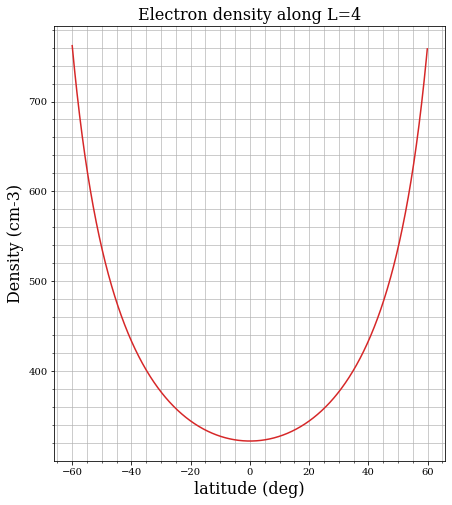

In [8]:
# latitudes of interest
lats_deg = np.arange(-60,60,0.1)
# cobert to rad from deg
lats_rad = np.deg2rad(lats_deg)
# L_shell of interest
L_shell=4

#initialise empty arrays
ne_L4_ozh=[]
ne_eq_L4_ozh=[]

for i in range(0,len(lats_rad)):
    #call environment_mod.densities_ozhogin
    netmp=env.density_ozhogin(L_shell,lats_rad[i])
    ne_L4_ozh.append(netmp[1])
    ne_eq_L4_ozh.append(netmp[0])
    
###Plot Output##############################################
fig, ax = plt.subplots(figsize=(7,8))
s=5
ax.set_title('Electron density along L=4',fontsize=16)
ax.set_xlabel("latitude (deg)",fontsize=16)
ax.set_ylabel("Density (cm-3)",fontsize=16)

ax.plot(lats_deg,ne_L4_ozh,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
#############################################################    



[Return to top](#top-bullet) 

## 8. environment.density_equ_sheeley  <a class="anchor" id="densities_palsmasphere_sheeley-bullet"></a>

**Routine to calculate the equatorial electron density along a magnetic field line after [Sheeley et al., 2012]**

***

**<font color='blue'>Description</font>**

$$n_{eq}(L)=1390(3/L)^{4.8} \pm 440(3/L)^{3.6}$$

for $3\leq L\leq7$


***

**<font color='red'>Inputs</font>**

**L_arg**: Lshell


***

**<font color='green'>Outputs</font>**

**ne_mean**: equatorial electron number density in cm^-3
**ne_min**: lower limit
**ne_max**: upper limit

***

**Reference**

Sheeley, B. W., Moldwin, M. B., Rassoul, H. K., and Anderson, R. R. (2001), An empirical plasmasphere and trough density model: CRRES observations, J. Geophys. Res., 106( A11), 25631– 25641, doi:10.1029/2000JA000286. 

***

[Return to top](#top-bullet) 

### Example

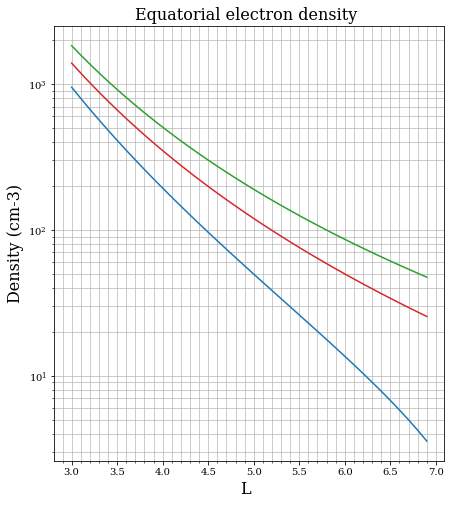

In [9]:
#L range of interest
L_range=np.arange(3,7,0.1)

#Call environment_mod.densities_palsmasphere_sheeley routine
ne_mean,ne_min,ne_max=env.density_equ_sheeley(L_range)

###Plot Output##############################################
fig, ax = plt.subplots(figsize=(7,8))
s=5
ax.set_title('Equatorial electron density ',fontsize=16)
ax.set_xlabel("L ",fontsize=16)
ax.set_ylabel("Density (cm-3)",fontsize=16)

ax.plot(L_range,ne_mean,color="tab:red")
ax.plot(L_range,ne_min,color="tab:blue")
ax.plot(L_range,ne_max,color="tab:green")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.set_yscale('log')
ax.grid(alpha=.3)

ax.grid(True, which="both",alpha=.8)
plt.show()
#############################################################    

## 9. environment_mod.omega_cyclotron <a class="anchor" id="omega_cyclotron-bullet"></a>

**Routine to calculate the gyrofrequency of a particle**

***

**<font color='blue'>Description</font>**

$$\Omega_{s}=\frac{q_s B}{m_s}$$

***

**<font color='red'>Inputs</font>**


**B_arg**: Geomagnetic field strength in T

**q_arg**: particle charge in Cb

**m_arg**: particle mass in kg

***

**<font color='green'>Outputs</font>**

**omega_tmp**: particle gyrofrequency in rad/s

***

[Return to top](#top-bullet) 

## 10. environment_mod.omega_plasma <a class="anchor" id="omega_plasma-bullet"></a>

**Routine to calculate the plasma frequency**

***

**<font color='blue'>Description</font>**

$$\omega_{ps}=\frac{N_{s}q_{s}^2}{\epsilon_{0}m_{s}}$$

***

**<font color='red'>Inputs</font>**

**n_arg**: particle number density in $m^{-3}$

**q_arg**: particle charge in Cb

**m_arg**: particle mass in kg

***

**<font color='green'>Outputs</font>**


**omegap_tmp**: plasma frequency in rad/s

***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 87
 
[Return to top](#top-bullet) 

## 11. environment_mod.omega_uh <a class="anchor" id="omega_upper_hybrid-bullet"></a>

**Routine to calculate the upper hybrid resonance frequency**

***

**<font color='blue'>Description</font>**

$$\omega_{uh}=\sqrt{w_{pe}^2+w_{ce}^2}$$

***

**<font color='red'>Inputs</font>**

**wce_arg**: electron gyrofrequency 

**wpe_arg**: electron plasma frequency 


***

**<font color='green'>Outputs</font>**

**tmp**: upper hybrid resonance frequency


***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 377
 
[Return to top](#top-bullet) 

## 12. environment_mod.omega_lower_hybrid <a class="anchor" id="omega_lower_hybrid-bullet"></a>

**Routine to calculate the lower hybrid resonance frequency**

***

**<font color='blue'>Description</font>**

$$\frac{1}{\omega_{lh}^2}=\frac{1}{\omega_{ce}\omega_{ci}}+\frac{1}{\omega_{pi}^2}$$

***

**<font color='red'>Inputs</font>**

**wce_arg**: electron gyrofrequency 

**wpe_arg**: electron plasma frequency 

**wci_arg**: ion gyrofrequency 

**wpi_arg**: ion plasma frequency 

***

**<font color='green'>Outputs</font>**


**wlh_tmp**: lower hybrid resonance frequency


***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 379

[Return to top](#top-bullet) 

### Example

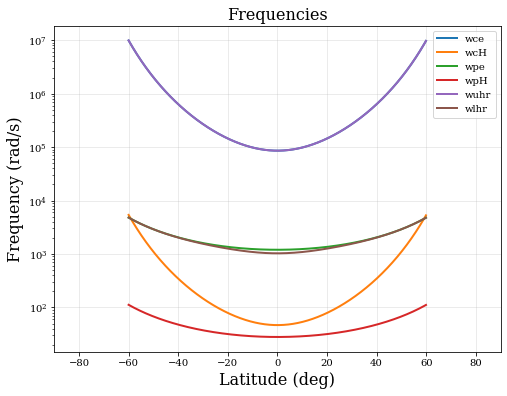

In [10]:
#Latitude range of interest
lats_deg = np.arange(-60,60,0.1)
#Convert from deg to rad
lats_rad = np.deg2rad(lats_deg)
#L shell of ineterst
L_shell=4

#Call environment_mod.Bmag_dipole
Bmag=env.Bmag_dipole(L_shell,lats_rad)

#Call environment_mod.omega_cyclotron
wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
wcH=env.omega_cyclotron(Bmag,env.const.qi,env.const.mH)

#Define equatorial electron density(environment_mod.carpender_anderson)
ne0=ne_eq_L4
#Calculate electron density along the field line (environment_mod.densities_denton)
ne=env.density_FL_denton(ne0,lats_rad)

#Call environment_mod.omega_plasma
wpe=env.omega_plasma(ne,env.const.qe,env.const.me)
wpH=env.omega_plasma(ne,env.const.qi,env.const.mH)

#Call environment_mod.omega_lh
wlhr=env.omega_lhr(wce,wpe,wcH,wpH)
#Call environment_mod.omega_uh
wuhr=env.omega_uhr(wce,wpe)




###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=16
ax.plot(lats_deg,wce,label='wce',linewidth=s)
ax.plot(lats_deg,wcH,label='wcH',linewidth=s)
ax.plot(lats_deg,wpe,label='wpe',linewidth=s)
ax.plot(lats_deg,wpH,label='wpH',linewidth=s)
ax.plot(lats_deg,wuhr,label='wuhr',linewidth=s)
ax.plot(lats_deg,wlhr,label='wlhr',linewidth=s)

ax.set_title('Frequencies',fontsize=fonts)
ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Frequency (rad/s)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()



[Return to top](#top-bullet) 

### Example

## 13. environment_mod.aeq2alpha <a class="anchor" id="aeq2alpha-bullet"></a>

**Routine to translate equatorial pitch angle to local pitch angle**

***

**<font color='blue'>Description</font>**

The first adaibatic invariant

$$M=\frac{p_{\perp}^2}{2m_{s0}B} \propto \frac{\sin^2 \alpha}{B} $$

where $p_{\perp}$ is the perpendicular component of the electron momentum, $m_{s0}$ is
the particle rest mass, $B_0$ is the magnetic field intensity, and $\alpha$ is the local electron pitch angle
defined as $\alpha=\tan^{-1}(u_{\perp}/u_z)$. The velocity components parallel ($u_\parallel$) and perpendicular ($u_{\perp}$) to the magnetic field can be specified using as:

$$u_\parallel(\lambda)=u\cos \alpha (\lambda)$$
$$u_{\perp}(\lambda)=u\sin \alpha (\lambda)$$

From the conservation of the fisrt adiabatic inveriant

$$ \sin^2 \alpha (\lambda) = \frac{B(\lambda)}{B_{eq}} \sin^2 \alpha_{eq} $$

***

**<font color='red'>Inputs</font>**

**L_arg**: L shell

**lambda_arg**: magnetic latitude in rad

**aeq_arg**: equatorial pitch angle in rad

***

**<font color='green'>Outputs</font>**

**alpha0**: local pitch angle in rad

***

[Return to top](#top-bullet) 

### Example

In [11]:
#Lattitude of interest
lat_deg = 10
#convert to rad
lat_rad = np.deg2rad(lat_deg)
#L of interest
L_shell=4
#Equatorial pitch angle
aeq_deg=30
#convert to rad
aeq_rad=np.deg2rad(aeq_deg)

#call environment_mod.aeq2alpha
alpha_local=env.aeq2alpha(L_shell,lat_rad,aeq_rad)

print('latitude:',lat_deg, 'deg')
print('L_shell:',L_shell)
print('equatorial pitch angle:',aeq_deg, 'deg')
print('local pitch angle:',np.rad2deg(alpha_local), 'deg')

latitude: 10 deg
L_shell: 4
equatorial pitch angle: 30 deg
local pitch angle: 32.34093633311206 deg


[Return to top](#top-bullet) 

## 14. environment_mod.alpha2aeq <a class="anchor" id="alpha2aeq-bullet"></a>

**Routine to translate local pitch angle to equatorial pitch angle**

***

**<font color='blue'>Description</font>**


$$ \sin^2 \alpha_{eq} (\lambda) = \frac{B_{eq}}{B(\lambda)} \sin^2 \alpha $$

***

**<font color='red'>Inputs</font>**

**L_arg**: L shell

**lambda_arg**: magnetic latitude in rad

**alpha_arg**: equatorial pitch angle in rad

***

**<font color='green'>Outputs</font>**


**alphaeq0**: local pitch angle in rad

***
[Return to top](#top-bullet) 

### Example

In [12]:
#Lattitude of interest
lat_deg = 10
#convert to rad
lat_rad = np.deg2rad(lat_deg)
#L of interest
L_shell=4
#local pitch angle
alpha_deg=30
#convert to rad
alpha_rad=np.deg2rad(alpha_deg)

#call environment_mod.aeq_local
aeq_local=env.alpha2aeq(L_shell,lat_rad,alpha_rad)

print('latitude:',lat_deg, 'deg')
print('L_shell:',L_shell)
print('local pitch angle:',alpha_deg, 'deg')
print('equatorial pitch angle:',np.rad2deg(aeq_local), 'deg')


latitude: 10 deg
L_shell: 4
local pitch angle: 30 deg
equatorial pitch angle: 27.860993160631715 deg


[Return to top](#top-bullet) 

### Example: Pitch angle mapping per L shell <a class="anchor" id="Pitch_angle_mapping-bullet"></a>

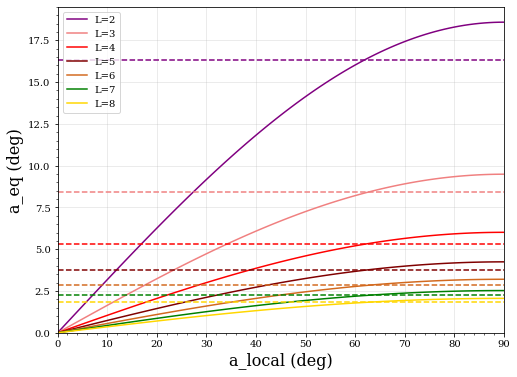

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Polygon
import matplotlib.colors as colors
from matplotlib import ticker, cm


H=500 #satellite altitude in km
Re=6370 #Earth radius in Re
B0=3.12*10**(-5)
Rsat=H+Re
r=Rsat
# Beq=B0*((Re/r)**3)

L=[2,3,4,5,6,7,8]
lam_rad=[]
lam_deg=[]
B_ratio=[]
a_eq_L2=[]
a_eq_L3=[]
a_eq_L4=[]
a_eq_L5=[]
a_eq_L6=[]
a_eq_L7=[]
a_eq_L8=[]
alc=[]
Beq=[]

for i in range(0,len(L)):
    cos_lam=np.sqrt(r/(Re*L[i]))
    lam_tmp=np.arccos(cos_lam)
    lam_deg_tmp=np.rad2deg(lam_tmp)
    lam_rad.append(lam_tmp)
    lam_deg.append(lam_deg_tmp)

    Beq_tmp=B0*((1/L[i])**3)
    Beq.append(Beq_tmp)

for i in range(0,len(L)):
    fac1=4*(L[i]**6)-3*(L[i]**5)
    fac1=np.sqrt(fac1)
    fac1=1/fac1
    sinalc=np.sqrt(fac1)
    alc_tmp=np.arcsin(sinalc)
    alc_deg=np.rad2deg(alc_tmp)
    alc.append(alc_deg)
#     print(alc_deg)


# print(lam_rad)

for k in range(0,len(lam_rad)):
    sin_lam=np.sin(lam_rad[k])
    sin_sq=sin_lam**2
    clat=np.sin(lam_rad[k])
    sqrt=np.sqrt(1+3*sin_sq)
    B_lam=B0*((Re/r)**3)*sqrt
    
    B_ratio_tmp=Beq[k]/B_lam
    B_ratio.append(B_ratio_tmp)

a_local=np.arange(0,91,1)
a_local_rad=np.deg2rad(a_local)

#L=2
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[0]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L2.append(aeq_deg)
    # print(np.rad2deg(a_local_rad[l]),aeq_deg)

#L=3
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[1]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L3.append(aeq_deg)
    # print(np.rad2deg(a_local_rad[l]),aeq_deg)

#L=4
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[2]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L4.append(aeq_deg)

#L=5
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[3]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L5.append(aeq_deg)

#L=6
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[4]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L6.append(aeq_deg)

#L=7
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[5]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L7.append(aeq_deg)

#L=7=8
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[6]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L8.append(aeq_deg)
    
fig, ax = plt.subplots(figsize=(8,6))
s=5


ax.set_xlabel("a_local (deg)",fontsize=16)
ax.set_ylabel("a_eq (deg)",fontsize=16)

ax.plot(a_local,a_eq_L2,color="purple", label='L=2')
ax.plot(a_local,a_eq_L3,color="lightcoral", label='L=3')
ax.plot(a_local,a_eq_L4,color="red", label='L=4')
ax.plot(a_local,a_eq_L5,color="maroon", label='L=5')
ax.plot(a_local,a_eq_L6,color="chocolate", label='L=6')
ax.plot(a_local,a_eq_L7,color="green", label='L=7')
ax.plot(a_local,a_eq_L8,color="gold", label='L=8')

ax.axhline(y=alc[0], color='purple', linestyle='--')
ax.axhline(y=alc[1], color='lightcoral', linestyle='--')
ax.axhline(y=alc[2], color='red', linestyle='--')
ax.axhline(y=alc[3], color='maroon', linestyle='--')
ax.axhline(y=alc[4], color='chocolate', linestyle='--')
ax.axhline(y=alc[5], color='green', linestyle='--')
ax.axhline(y=alc[6], color='gold', linestyle='--')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.grid(alpha=.3)
ax.set_xlim(0,90)
ax.set_ylim(0,None)
ax.legend()
# ax.set_xlabel('time (sec)')
# ax.set_ylabel('$\mu$ ')
# ax2.set_ylabel("Latitude [deg]",color=tableau20[2],fontsize=14)
plt.show()

[Return to top](#top-bullet) 

## 15. environment_mod.T_bounce <a class="anchor" id="bounce_period-bullet"></a>

**Calculate the bounce period of a trapped particle**

***

**<font color='blue'>Description</font>**

$$\tau_b \approx 0.117 L\frac{c}{u}\Big[ 1-0.4635(\sin\alpha_{eq})^{3/4}\Big]$$

***

**<font color='red'>Inputs</font>**

**L_arg**: L shell

**v_arg**: particle velocity in m/s

**aeq_arg**: equatorial pitch angle


***

**<font color='green'>Outputs</font>**

**tmp**: Bounce period in s

**Reference**

Öztürk, M. Kaan. "Trajectories of charged particles trapped in Earth’s magnetic field." American Journal of Physics 80.5 (2012): 420-428.

P. A. Sturrock, Plasma Physics: An Introduction to the Theory of Astro-
physical, Geophysical, and Laboratory Plasmas (Cambridge U.P., Cam-
bridge, UK, 1994)

***

[Return to top](#top-bullet) 




### 16. environment_mod.T_drift <a class="anchor" id="drift_period-bullet"></a>

**Calculate the drift period of a trapped particle**

***

**<font color='blue'>Description</font>**

$$\tau_d \approx \frac{2\pi q B_0 R_e^3}{mu^2}\frac{1}{LR_e}\Big[1-\frac{1}{3}(\sin\alpha_{eq})^{0.62}\Big]$$

**Inputs**:

**pper_arg**: paerpendicular to the magnetic field momentum component

**B_arg**: Magnetic field strength

**m_arg**: Particle mass


***

**<font color='red'>Inputs</font>**

**tmp**: Drift period in s

**Reference**

Öztürk, M. Kaan. "Trajectories of charged particles trapped in Earth’s magnetic field." American Journal of Physics 80.5 (2012): 420-428.

P. A. Sturrock, Plasma Physics: An Introduction to the Theory of Astro-
physical, Geophysical, and Laboratory Plasmas (Cambridge U.P., Cam-
bridge, UK, 1994)

***

[Return to top](#top-bullet) 




### Example

In [14]:
#Kinetic energy in keV
EkeV_=168
# Latitude of interest
lat_deg = 10
#convert to rad
lat_rad = np.deg2rad(lat_deg)
#L shell of interest
L_shell=4
#equatorial pitch angle
aeq_deg=30
#convert to rad
aeq_rad=np.deg2rad(aeq_deg)

#magnetic field strength(environment_mod.Bmag_dipole)
Bmag=env.Bmag_dipole(L_shell,lat_rad)

#gyrofrequency(environment_mod.omega_cyclotron)
wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)

#gyro period
tc=2*np.pi/wce

#local pitch angle(environment_mod.aeq2alpha)
alpha_local=env.aeq2alpha(L_shell,lat_rad,aeq_rad)

#calculate velocities and momentums(environment_mod.momentums)
upar_,uper_,ppar_,pper_,gamma_=env.initial_velocity(EkeV_,alpha_local,env.const.me)

#velocity magnitude
umag=np.sqrt(upar_*upar_+uper_*uper_)

#bounce period (environment_mod.bounce_period)
tb=env.T_bounce(L_shell,umag,aeq_rad)
#drift period (environment_mod.drift_period)
td=env.T_drift(Bmag,env.const.me,umag,L_shell,aeq_rad)

print('cyclotron period:',tc,'s')
print('bounce period:',tb,'s')
print('drift period:',td,'s')

cyclotron period: 6.401584793531712e-05 s
bounce period: 0.5148365684769513 s
drift period: 126.02612828165691 s


[Return to top](#top-bullet) 

## 17. environment_mod.R_Larmor <a class="anchor" id="larmor-bullet"></a>

**Routine to calculate the larmor radius**

***

**<font color='blue'>Description</font>**

$$r_L=\frac{\gamma m_s u_\perp}{q_s B}$$

***

**<font color='red'>Inputs</font>**

**uperp_arg**: perpendicular velocity in m/s

**gamma_arg**: Lorentz factor

**B_arg**: Magnetic field in T

**ms_arg**: particle mass

**qs_arg**: particle charge

***

**<font color='green'>Outputs</font>**


**rl_tmp**: Larmor radius in m


***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 87

[Return to top](#top-bullet) 

### Example

In [15]:
#Kinetic energy in keV
EkeV_=168
# Latitude of interest
lat_deg = 10
#convert to rad
lat_rad = np.deg2rad(lat_deg)
#L shell of interest
L_shell=4
#equatorial pitch angle
aeq_deg=30
#convert to rad
aeq_rad=np.deg2rad(aeq_deg)

#magnetic field strength(environment_mod.Bmag_dipole)
Bmag=env.Bmag_dipole(L_shell,lat_rad)

#local pitch angle(environment_mod.aeq2alpha)
alpha_local=env.aeq2alpha(L_shell,lat_rad,aeq_rad)

#calculate velocities and momentums(environment_mod.momentums)
upar_,uper_,ppar_,pper_,gamma_=env.initial_velocity(EkeV_,alpha_local,env.const.me)

#calculate larmor radius(environment_mod.larmor)
rl=env.R_Larmor(uper_,gamma_,Bmag,env.const.me,env.const.qe)

print('Larmor radius:',rl,'m')

Larmor radius: 1429.7285342095051 m


## 18. environment_mod.mu_adiabatic <a class="anchor" id="mu_adiabatic-bullet"></a>

**Routine to calculate the first adiabatic invariant**

***

**<font color='blue'>Description</font>**

$$\mu=\frac{p_\perp^2}{2 m B}$$

***

**<font color='red'>Inputs</font>**

**pper_arg**: perpendicualr to the magnetic field component of momentum

**B_arg**: magnetic field strength

**m_arg**: particle mass


***

**<font color='green'>Outputs</font>**

**tmp**: first adiabatic invariant


***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 90
 
[Return to top](#top-bullet) 

### Example

In [16]:
EkeV_=168
lat_deg = 10
lat_rad = np.deg2rad(lat_deg)
L_shell=4
aeq_deg=30
aeq_rad=np.deg2rad(aeq_deg)
Bmag=env.Bmag_dipole(L_shell,lat_rad)

alpha_local=env.aeq2alpha(L_shell,lat_rad,aeq_rad)

upar_,uper_,ppar_,pper_,gamma_=env.initial_velocity(EkeV_,alpha_local,env.const.me)
mu_ad=env.mu_adiabatic(pper_,Bmag,env.const.me)

print('First adiabatic invariant:',mu_ad)


First adiabatic invariant: 1.60723697506637e-08


[Return to top](#top-bullet) 

## 19. environment_mod.initial_velocity <a class="anchor" id="momentums-bullet"></a>

**Routine to calculate velocities and momentums from energy and pitch angle**

***

**<font color='blue'>Description</font>**

$$E_{joule}=1.602176487 \times 10^{-16} E_{keV}$$
$$\gamma=\frac{E_{joule}}{m_e c^2}+1$$
$$\beta=\sqrt{1-\frac{1}{\gamma^2}}$$
$$u=\beta c$$
$$u_\perp=u\sin\alpha$$
$$u_\parallel=u\cos\alpha$$
$$p_\perp=\gamma m_s u_\perp$$
$$p_\parallel=\gamma m_s u_\parallel$$
***

**<font color='red'>Inputs</font>**

**Ekev**: energy in keV

**alpha**: local pitch angle in rad

***

**<font color='green'>Outputs</font>**

**upar0**: parallel velocity in m/s

**uper0**: perpendicular velocity in m/s

**ppar0**: parallel momentum in N*s

**pper0**: perpendicular momentum in N*s

**gamma0**: Lorentz factor

***

[Return to top](#top-bullet) 

### Example

In [17]:
#Kinetic energy in keV
EkeV_=168
#local pitch angle
alpha_=np.deg2rad(20)

#call environment_mod.momentums
upar_,uper_,ppar_,pper_,gamma_=env.initial_velocity(EkeV_,alpha_,env.const.me)

print('Energy:',EkeV_,'kev')
print('alpha:',np.rad2deg(alpha_),'deg')
print('parallel velocity:',upar_,'m/s')
print('perpendicular velocity:',uper_,'m/s')
print('parallel momentum:',ppar_,'N*s')
print('perpendicular momentum:',pper_,'N*s')
print('Lorentz factor:',gamma_)

Energy: 168 kev
alpha: 20.0 deg
parallel velocity: 185509768.48734844 m/s
perpendicular velocity: 67520033.89500917 m/s
parallel momentum: 2.245445695265737e-22 N*s
perpendicular momentum: 8.17275395737906e-23 N*s
Lorentz factor: 1.3287608233233947


[Return to top](#top-bullet) 

## 20. environment_mod.loss_cone <a class="anchor" id="loss_cone-bullet"></a>

**Routine to calculate the loss cone angle**

***

**<font color='blue'>Description</font>**

$$\sin\alpha_{lc}=[L^3((4-3/L)^{1/2}]^{-1/2}$$

***

**<font color='red'>Inputs</font>**


**L_arg**: L shell


***

**<font color='green'>Outputs</font>**


**tmp**: loss cone angle in rad

***

**Refence**

Kivelson, Margaret G., Margaret Galland Kivelson, and Christopher T. Russell, eds. Introduction to space physics. Cambridge university press, 1995.

***

[Return to top](#top-bullet) 

In [18]:
#L shell of interest
Lshell=4

#call environment_mod.loss_cone
alc=env.loss_cone(Lshell)

print('Loss cone:',np.rad2deg(alc),'deg')

Loss cone: 5.341843503512352 deg


[Return to top](#top-bullet) 

## 21. environment_mod.loss_cone_v2 <a class="anchor" id="loss_cone_v2-bullet"></a>

**Another approximation for the calculation of the loss cone**

***

**<font color='blue'>Description</font>**


$$\sin\alpha_{lc}=\sqrt{\frac{\zeta_m}{1+3(1-\zeta_m}}$$

with

$$\zeta_m=\frac{R_e + h_m}{LR_e}$$

and $h_m$ is the height above the Earth's surface where the particles are lost (~100km)


***

**<font color='red'>Inputs</font>**


L_arg: L shell

h_arg: $h_m$ in km

***

**<font color='green'>Outputs</font>**

**tmp**: loss cone angle in rad

***

**Refence**

Lauben, D. S., Inan, U. S., and Bell, T. F. (2001). Precipitation of radiation belt electrons induced by
obliquely propagating lightning-generated whistlers. Journal of Geophysical Research: Space Physics
106, 29745–29770

***
[Return to top](#top-bullet) 

### Example

In [19]:
#L shell of interest
Lshell=4
#loss height
h_sim=100

#call environment_mod.loss_cone_v2
alc=env.loss_cone_v2(Lshell,h_sim)

print('Loss cone:',np.rad2deg(alc),'deg')

Loss cone: 5.341974343952732 deg


[Return to top](#top-bullet) 

## 22. environment_mod.debye_length <a class="anchor" id="debye_length-bullet"></a>

**Routine to calculate the debye length**

***

**<font color='blue'>Description</font>**


$$\lambda_D=\Big(\frac{\epsilon_0 k_B T}{n q_e^2}\Big)^{1/2}$$

***

**<font color='red'>Inputs</font>**

**ne_arg**: electron density in m^-3

**Te_arg**: electron temperature in K

***

**<font color='green'>Outputs</font>**


**tmp**: Debye length in m


***

**Reference**

 Parks G K 1991 Physics of Space Plasmas. An Introduction 1st edn (Redwood City, CA: Addison Wesley), p. 22
 
[Return to top](#top-bullet) 

### Example

In [20]:
Te=1000 #K
ne=10**7 #m^-3

deb_len=env.debye_length(ne,Te)

print('Debye length:',deb_len,'m')

Debye length: 0.47622398265861565 m


[Return to top](#top-bullet) 

## 23. environment_mod.const <a class="anchor" id="const-bullet"></a>


**File with all the needed constants**

***

**<font color='blue'>Description</font>**

**<font color='green'>Re</font>=** 6378137   *<font color='red'>Earth mean radius in m</font>*

**<font color='green'>c_light</font>=** 2.997956376932163e8 *<font color='red'>speed of light in m/s</font>*

**<font color='green'>me</font>=** 9.10938291e-31   *<font color='red'>electron mass in kg</font>*

**<font color='green'>qe</font>=** 1.602176565e-19 *<font color='red'>electron charge in C</font>*

**<font color='green'>qi</font>=** 1.602176565e-19 *<font color='red'>electron charge in C</font>*

**<font color='green'>mO</font>=** 2.67616E-026  *<font color='red'>oxygen mass in kg</font>*

**<font color='green'>mH</font>=** 1.6726E-027 *<font color='red'>hydrogen mass in kg</font>*

**<font color='green'>mHe</font>=** 6.6904E-027 *<font color='red'>helium mass in kg</font>*
 
**<font color='green'>epsilon0</font>=** 8.854187817e-12  *<font color='red'>vacuum dielectric permittivity</font>*

**<font color='green'>eps0</font>=** 8.854187817e-12  *<font color='red'>vacuum dielectric permittivity</font>* 

**<font color='green'>ms</font>=** [me,mH,mHe,mO]  *<font color='red'>vector of masses</font>*

**<font color='green'>qs</font>=** [qe,qi,qi,qi]    *<font color='red'>vector of charges</font>*

**<font color='green'>kb</font>=** 1.380649e-23 *<font color='red'>Boltzman constant</font>*

**<font color='green'>mu0</font>=** 1.2566370614e-6  *<font color='red'>vacuum permeability</font>*

[Return to top](#top-bullet) 